# Homework 4:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

## Forward difference

In this case, the definition of a derivitive is:

\begin{equation}
    \frac{dy}{dx} = \lim_{h\rightarrow 0} \frac{y(x+h) - y(x)}{h}
\end{equation}

We can use a Taylor series to expand $y(x)$ around some value $a$.

\begin{equation}
    y(x) = \sum_{n=0}^{\infty} \frac{ y^{(n)} (a)}{n!} (x-a)^n
\end{equation}

\begin{equation}
    y(x) \approx y(a) + y'(a)(x-a) + \frac{y''(a)}{2} (x-a)^2 + \frac{y'''(a)}{6} (x-a)^3
\end{equation}

We can then substitute this into the definition of a derivative:

\begin{equation}
    \frac{y(a+h) - y(a)}{h} = \frac{ \sum_{n=0}^{\infty}( \frac{ y^{(n)} (a)}{n!} (h)^n - \frac{ y^{(n)} (a)}{n!} (0)^n) }{h}
\end{equation}

The second term in the sum vanishes for $n\neq 0$, so we are left with:

\begin{equation}
    \frac{y(a+h) - y(a)}{h} = \frac{ \sum_{n=0}^{\infty}( \frac{ y^{(n)} (a)}{n!} (h)^n) - y(a) }{h}
\end{equation}

Which is equivalent to

\begin{equation}
    \frac{y(a+h) - y(a)}{h} = \frac{ \sum_{n=1}^{\infty}( \frac{ y^{(n)} (a)}{n!} (h)^n) }{h}
\end{equation}

Given some function $f(a;h)$ which approximates the derivative of $y$ at $a$, we can say that the error is

\begin{equation}
    \epsilon_{\text{truncation}} = \frac{y(a+h) - y(a)}{h} - y'(a) = \frac{ \sum_{n=2}^{\infty}( \frac{ y^{(n)} (a)}{n!} (h)^n) }{h}
\end{equation}

If we take the first term of $\epsilon_{\text{truncation}}$ we find it is:

\begin{equation}
    \epsilon_{\text{truncation}} \approx  \frac{ y'' (a)}{2} h
\end{equation}

Text(0, 0.5, 'error')

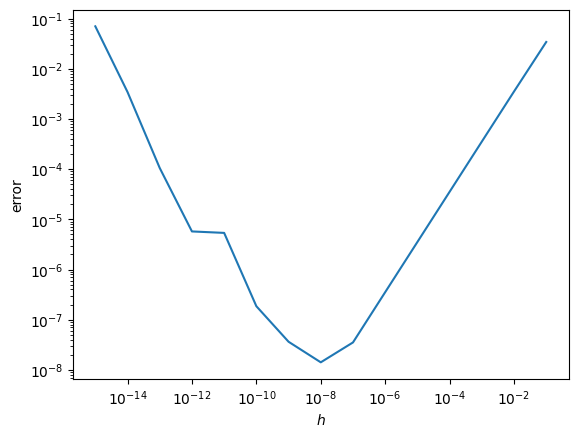

In [3]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

def ddx_fd(f:Callable, x:float, h:float)->float:
    """
    Forward difference of f evaluated at x with stepsize h.
    """
    return (f(x+h) - f(x)) / h

harr = np.logspace(-15,-1,15)
x = np.pi/4

dydx = np.zeros_like(harr)
func = np.cos
analytic = lambda x: -np.sin(x)

for i, h in enumerate(harr):
    dydx[i] = ddx_fd(func, x, h)

plt.plot(harr, np.abs(dydx - analytic(x)))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$h$')
plt.ylabel('error')

As expected, we see that $\epsilon \sim h$ for large $h$. The optimal value for $h$ is $10^{-8}$.

## Central Difference

Here, we instead define the derivative to be:

\begin{equation}
    \frac{dy}{dx} = \lim_{h\rightarrow 0} \frac{y(x+\frac{h}{2}) - y(x-\frac{h}{2})}{h}
\end{equation}

So when we substitute in our Taylor series we get:

\begin{equation}
    \frac{y(a+h) - y(a)}{h} = \frac{ \sum_{n=0}^{\infty}( \frac{ y^{(n)} (a)}{n!} (\frac{h}{2})^n - \frac{ y^{(n)} (a)}{n!} (\frac{-h}{2})^n) }{h}
\end{equation}

All even elements in the sum are now $0$, and we can recast the sum

\begin{equation}
    \frac{y(a+h) - y(a)}{h} = \frac{ 2 \sum_{n=0}^{\infty} \frac{ y^{(2n+1)} (a)}{(2n+1)!} (\frac{h}{2})^{(2n+1)} }{h}
\end{equation}

Now our truncation error is:

\begin{equation}
    \epsilon_{\text{truncation}} = \frac{y(a+h) - y(a)}{h} - y'(a) = \frac{ 2 \sum_{n=1}^{\infty}\frac{ y^{(2n+1)} (a)}{(2n+1)!} (\frac{h}{2})^{(2n+1)} }{h}
\end{equation}

Again, we take the first term

\begin{equation}
    \epsilon_{\text{truncation}} \approx \frac{ y''' (a)}{24} h^2
\end{equation}




Text(0, 0.5, 'error')

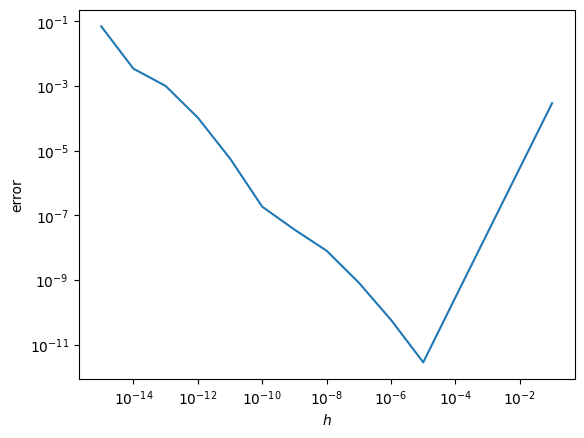

In [4]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

def ddx_cd(f:Callable, x:float, h:float)->float:
    """
    Central difference of f evaluated at x with stepsize h.
    """
    return (f(x+0.5*h) - f(x-0.5*h)) / h

harr = np.logspace(-15,-1,15)
x = np.pi/4

dydx = np.zeros_like(harr)
func = np.cos
analytic = lambda x: -np.sin(x)

for i, h in enumerate(harr):
    dydx[i] = ddx_cd(func, x, h)

plt.plot(harr, np.abs(dydx - analytic(x)))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$h$')
plt.ylabel('error')

Here we get an improvement of 8 orders of magnitude when we decrease the stepsize by 4 orders of magnitude. This is expected as $\epsilon_{\text{truncation}} \sim h^2$. The optimal value for $h$ is $10^{-5}$

## Changing x

Recall the two trucation errors discussed above:

\begin{equation}
    \epsilon_{\text{fd}} \approx  \frac{ y'' (a)}{2} h
\end{equation}

\begin{equation}
    \epsilon_{\text{cd}} \approx \frac{ y''' (a)}{24} h^2
\end{equation}

If we let $y = \cos{x}$ then we can evaluate them:

\begin{equation}
    \epsilon_{\text{fd}} \approx  \frac{ -\cos{a}}{2} h
\end{equation}

\begin{equation}
    \epsilon_{\text{cd}} \approx \frac{ \sin{a}}{24} h^2
\end{equation}

We now will repeat our analysis of the central difference algoritm, but at $x=0$. The expectation is that since $sin{0}=0$, our algorithm should
be able to compute the derivative exactly.

Text(0, 0.5, 'error')

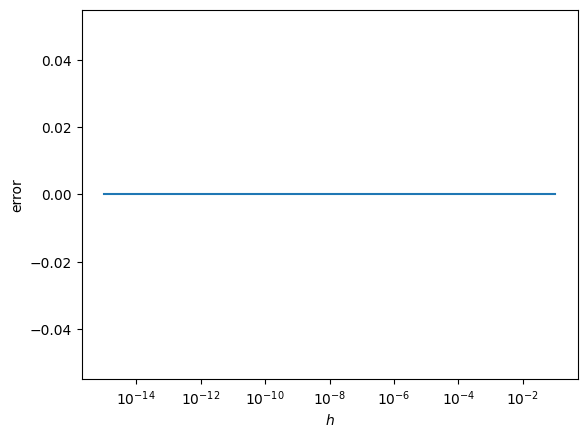

In [20]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

def ddx_cd(f:Callable, x:float, h:float)->float:
    """
    Central difference of f evaluated at x with stepsize h.
    """
    return (f(x+0.5*h) - f(x-0.5*h)) / h

harr = np.logspace(-15,-1,15)
x = 0

dydx = np.zeros_like(harr)
func = np.cos
analytic = lambda x: -np.sin(x)

for i, h in enumerate(harr):
    dydx[i] = ddx_cd(func, x, h)

plt.plot(harr, np.abs(dydx - analytic(x)))
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('$h$')
plt.ylabel('error')

As expected, $\epsilon_{\text{cd}} = 0$ independent of $h$. There are two factors that affect this.

* The truncation error is zero becasue $sin{x}=0$. This is true even for higher order terms of trucation error because all odd derivatives of cosine are sine.
* The round off error is zero because the true value (1) can be represented perfectly by a floating point number.